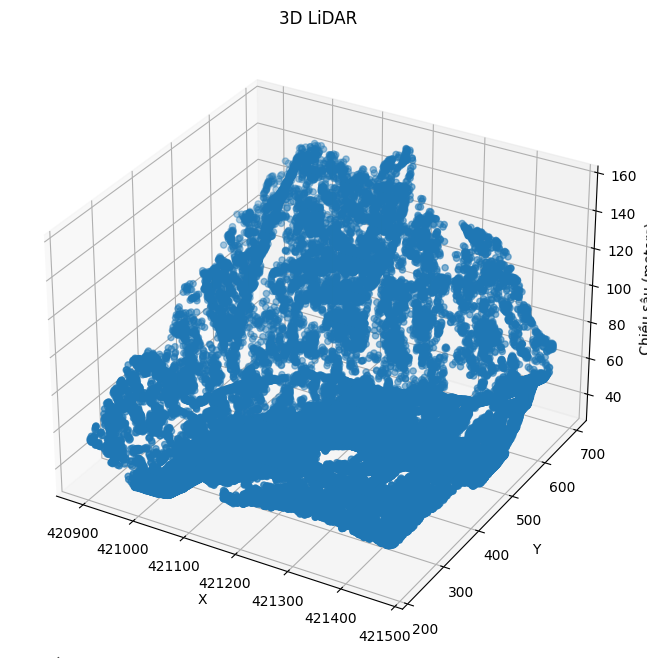

In [10]:
import laspy
import numpy as np
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file LiDAR
las = laspy.read('realworld.las')

p = las.xyz
x, y, z = p[:,0], p[:,1], p[:,2]

# Tạo biểu đồ 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z)

# Đặt tiêu đề
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Chiều sâu (meters)')
ax.set_title('3D LiDAR')

plt.show()

In [11]:
z_new = z.reshape(-1, 1)

In [12]:
n = int(input('Nhập số cụm: '))
max_iter = int(input('Nhập số lần lặp: '))

## Thuật toán K-Mean

/home/gingdev/Code/python/lidar/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Tâm cụm 0: [37.01099159]
Tâm cụm 1: [104.4315557]
Tâm cụm 2: [52.68477176]
Cụm 0 có 98448 phần tử
Cụm 1 có 9056 phần tử
Cụm 2 có 58776 phần tử


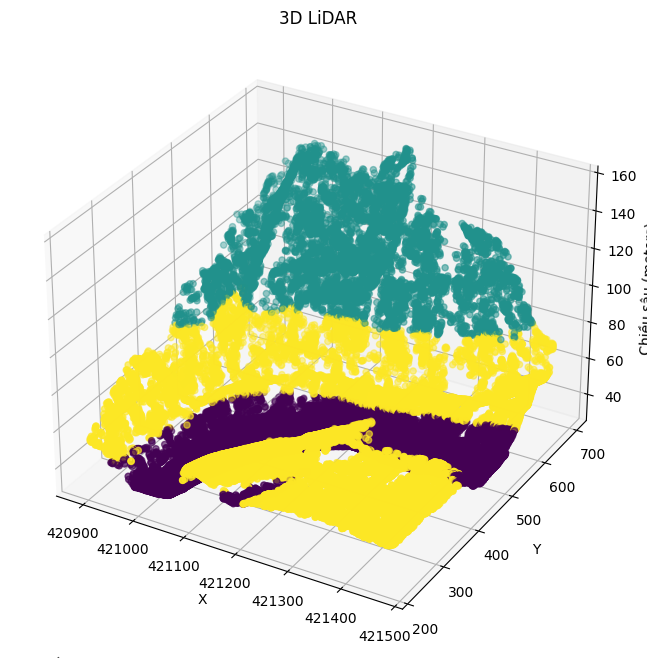

In [13]:
from sklearn.cluster import KMeans

# Thực hiện thuật toán K-Means
kmean = KMeans(n_clusters=n, random_state=0, max_iter=max_iter).fit(z_new)
labels = kmean.predict(z_new)

# Vẽ biểu đồ sau khi phân cụm
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=labels)

# Đặt tiêu đề
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Chiều sâu (meters)')
ax.set_title('3D LiDAR')

for i, c_z in enumerate(kmean.cluster_centers_):
    print(f'Tâm cụm {i}: {c_z}')

for i, count in enumerate(np.bincount(labels)):
    print(f'Cụm {i} có {count} phần tử')

## Thuật toán EM (Expectation-maximization) dạng Gaussian Mixture Models

Cụm 0 có 61089 phần tử
Cụm 1 có 93151 phần tử
Cụm 2 có 12040 phần tử


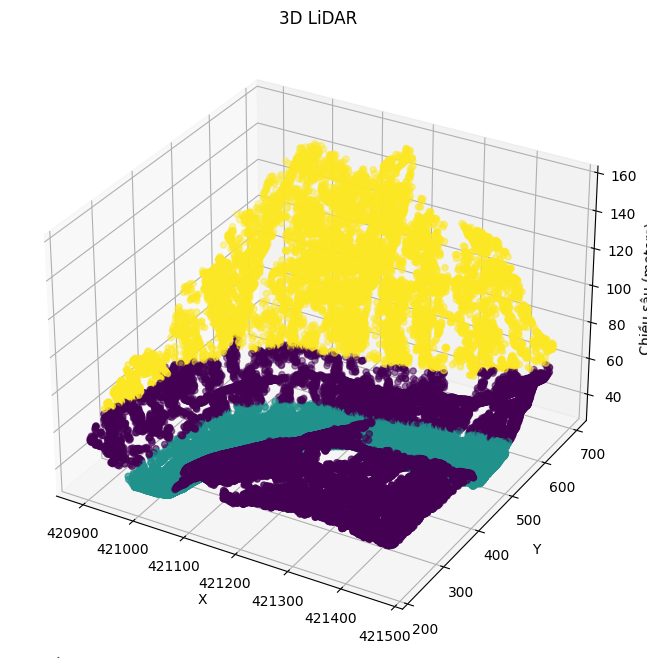

In [14]:
# https://scikit-learn.org/stable/modules/mixture.html#gaussian-mixture
from sklearn.mixture import GaussianMixture

# Thực hiện thuật toán EM
em = GaussianMixture(n_components=n, max_iter=max_iter).fit(z_new)
labels = em.predict(z_new)

# Vẽ biểu đồ sau khi phân cụm bằng thuật toán EM
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c=labels)

# Đặt tiêu đề
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Chiều sâu (meters)')
ax.set_title('3D LiDAR')

for i, count in enumerate(np.bincount(labels)):
    print(f'Cụm {i} có {count} phần tử')
